# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [7]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [133]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [134]:
df_train.shape

(15223, 52)

In [135]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [136]:
df_test.shape

(14910, 52)

In [137]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [150]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [156]:
df = df_test.append(df_train).reset_index(drop=True)

In [157]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 52 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [21]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Среднее', 'Высшее', 'Среднее специальное', 'Неоконченное высшее', 'Два и более высших образования', 'Неполное среднее'}


MARITAL_STATUS
{'Состою в браке', 'Разведен(а)', 'Не состоял в браке', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Салоны красоты и здоровья', 'Нефтегазовая промышленность', 'Здравоохранение', 'Информационные услуги', 'Банк/Финансы', 'Торговля', 'Энергетика', 'Маркетинг', 'Страхование', 'Развлечения/Искусство', 'Химия/Парфюмерия/Фармацевтика', 'ЧОП/Детективная д-ть', 'Другие сферы', 'Государственная служба', 'Сборочные производства', 'СМИ/Реклама/PR-агенства', 'Наука', 'Строительство', 'Недвижимость', 'Логистика', 'Подбор персонала', 'Юридические услуги/нотариальные услуги', 'Ресторанный бизнес/Общественное питание', 'Туризм', 'Металлургия/Промышленность/Машиностроение', 'Транспорт', 'Управляющая компания', 'Коммунальное хоз-во/Дорожные службы', 'Образование', 'Информационные технологии', 'Сельское хозяйство'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [153]:
df['LOAN_MAX_DLQ_AMT']=df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [96]:
# можем заменить пустые значения на "Другое" ( тем более что такое значение уже есть в этих полях ) и оставить строковые для дальнейшей интерпретации
#WORK_TIME и 'PREVIOUS_CARD_NUM_UTILIZED' не изменят смысл, если пустые заменить 0
df=df.fillna(value={'GEN_INDUSTRY':'Другое','GEN_TITLE':'Другое','ORG_TP_STATE':'Другое', 'TP_PROVINCE':'Неизвестно', 'WORK_TIME':0,'PREVIOUS_CARD_NUM_UTILIZED':0})

# можем добавить новые колонки, разбив их по значениям, пустые строки станут 0 во всех новых столбцах, для капитала и отдела смысл при этом не потеряется 
df['ORG_TP_FCAPITAL_WITH']=df['ORG_TP_FCAPITAL'].map(lambda x: 1 if x == 'С участием' else 0)
df['ORG_TP_FCAPITAL_WITHOUT']=df['ORG_TP_FCAPITAL'].map(lambda x: 1 if x == 'Без участия' else 0)

df['JOB_DIR_SB']=df['JOB_DIR'].map(lambda x: 1 if x == 'Служба безопасности' else 0)

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [58]:
# из строковых полей все можно считать категориальными , даже адреса, т.к. хоть значения справочные и их много, 
# принадлежность к определнному региону может оказаться важной для анализа, поэтому по хорошему все поля нужно разбить 
#на колонки, которые будут иметь смысл принадлежности поля к определнному значению и заполнить 1 в строках, где наше поле принимает или 0, где не принимает, значение новой колонки
df['ORG_TP_STATE_NotCom']=df['ORG_TP_STATE'].map(lambda x: 1 if x == 'Некоммерческая организация' else 0)
df['ORG_TP_STATE_IP']=df['ORG_TP_STATE'].map(lambda x: 1 if x == 'Индивидуальный предприниматель' else 0)
df.head(20)

#а FAMILY_INCOME нужно заполнить по верхней границе дохода, колонка приобретет не интервальный характер, а макс значение
#что лучше чем разбивать по колонкам - сохранить сравнимые показатели в одном поле
#хоть для "свыше 50000" и нет макс значения, установив произвольные 100000 мы уже будем иметь показать для наших данных
ddd['FAMILY_INCOME']=ddd['FAMILY_INCOME'].map(lambda x: 5000 if x == 'до 5000 руб.' else (10000 if x == 'от 5000 до 10000 руб.' 
                                                                                        else ( 20000 if x == 'от 10000 до 20000 руб.' 
                                                                                              else (50000 if x == 'от 20000 до 50000 руб.' else 100000))))

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [154]:
def category(df_input, NameCol):
    
    val_col = set(df_input[NameCol][df_input[NameCol].notnull()])
    j=0
    for i in val_col:
        df_input[NameCol+'_'+str(j)]=df_input[NameCol].map(lambda x: 1 if x == i else 0)
        j=j+1
    
    df_input= df_input.drop(NameCol, axis = 1)
    
    return df_input

In [165]:
def preproc_data(df_input):
    df_output = df_input.copy()
    
    
    ## Your Code Here
    df_output= df_output.drop(columns='AGREEMENT_RK')
    
    df_output['PERSONAL_INCOME']=df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT']=df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT']=df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT']=df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT']=df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
    df_output=df_output.fillna(value={'WORK_TIME':0,'PREVIOUS_CARD_NUM_UTILIZED':0}) #пропуски в числовых полях заполняем 0

    # то, что можно превратить в числовые данные, превращаем
    df_output['FAMILY_INCOME']=df_output['FAMILY_INCOME'].map(lambda x: 5000 if x == 'до 5000 руб.' else (10000 if x == 'от 5000 до 10000 руб.' 
                                                                                        else ( 20000 if x == 'от 10000 до 20000 руб.' 
                                                                                              else (50000 if x == 'от 20000 до 50000 руб.' else 100000))))
    
    # образование представляется сравнимым - переведем его в числа - чем больше число, тем выше образование
    df_output['EDUCATION']=df_output['EDUCATION'].map(lambda x: 0 if x == 'Неполное среднее'
                                                     else (1 if x == 'Среднее' 
                                                          else (2 if x == 'Среднее специальное'
                                                               else (3 if x == 'Неоконченное высшее'
                                                                    else (4 if x == 'Высшее'
                                                                         else (5 if x == 'Два и более высших образования'
                                                                              else 6))))))
    df_output=df_output.drop('EDUCATION',1)

    
    #остальные строковые поля категоризируем   
    df_output['ORG_TP_FCAPITAL_WITH']=df_output['ORG_TP_FCAPITAL'].map(lambda x: 1 if x == 'С участием' else 0)
    df_output['ORG_TP_FCAPITAL_WITHOUT']=df_output['ORG_TP_FCAPITAL'].map(lambda x: 1 if x == 'Без участия' else 0)
    df_output= df_output.drop(columns='ORG_TP_FCAPITAL')

    #дальше нужно запроцедурить 
    for i in df_output.columns: 
        if str(df_output[i].dtype) == 'object':
            if i!='sample':
                df_output= category(df_output,i)
    
    return df_output



In [262]:
df_preproc = df.pipe(preproc_data) 


df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [213]:

from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

## Your Code Here
target=df_train_preproc['TARGET']
df_train_preproc=df_train_preproc.drop('TARGET',axis=1)
X, X_test, y, y_test = train_test_split(df_train_preproc, target, test_size=0.3, random_state=42)

#### Задание 5. Обучение и оценка качества разных моделей

In [216]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
model=DecisionTreeClassifier()
model.fit(X,y)
predict_D=model.predict(X_test)
#predict_proba_D=model.predict_proba(X_test)

model=RandomForestClassifier()
model.fit(X,y)
predict_R=model.predict(X_test)
#predict_proba_R=model.predict_proba(X_test)

model=LogisticRegression()
model.fit(X,y)
predict_L=model.predict(X_test)
#predict_proba_L=model.predict_proba(X_test)

In [219]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('DecisionTreeClassifier:')
print('acc: '+str(accuracy_score(y_test,predict_D)))
print('prec: '+str(precision_score(y_test,predict_D)))
print('recall: '+str(recall_score(y_test,predict_D)))
print('RandomForestClassifier:')
print('acc: '+str(accuracy_score(y_test,predict_R)))
print('prec: '+str(precision_score(y_test,predict_R)))
print('recall: '+str(recall_score(y_test,predict_R)))
print('LogisticRegression')
print('acc: '+str(accuracy_score(y_test,predict_L)))
print('prec: '+str(precision_score(y_test,predict_L)))
print('recall: '+str(recall_score(y_test,predict_L)))

DecisionTreeClassifier:
acc: 0.7974600394131816
prec: 0.1509433962264151
recall: 0.14414414414414414
RandomForestClassifier:
acc: 0.8760674403328225
prec: 0.21052631578947367
recall: 0.007207207207207207
LogisticRegression
acc: 0.877819137289249
prec: 0.2857142857142857
recall: 0.0036036036036036037


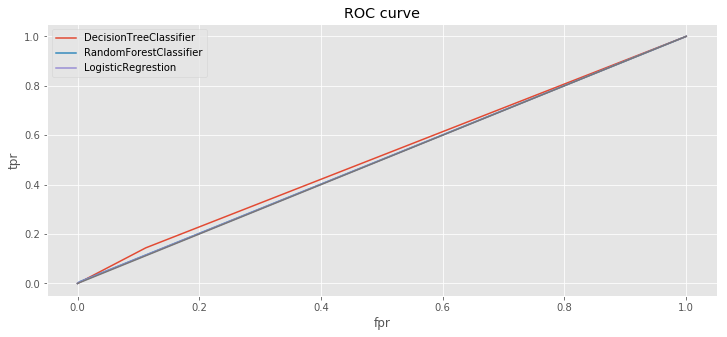

In [256]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here

from sklearn.metrics import roc_auc_score, roc_curve

fprD, tprD, thresholdsD = roc_curve(y_test, predict_D)
fprR, tprR, thresholdsR = roc_curve(y_test, predict_R)
fprL, tprL, thresholdsL = roc_curve(y_test, predict_L)
plt.plot(fprD, tprD,label='DecisionTreeClassifier')
plt.plot(fprR, tprR,label='RandomForestClassifier')
plt.plot(fprL, tprL,label='LogisticRegrestion')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()


In [224]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
model=DecisionTreeClassifier()
model.fit(X,y)
predict_proba_D=model.predict_proba(X_test)

model=RandomForestClassifier()
model.fit(X,y)
predict_proba_R=model.predict_proba(X_test)


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


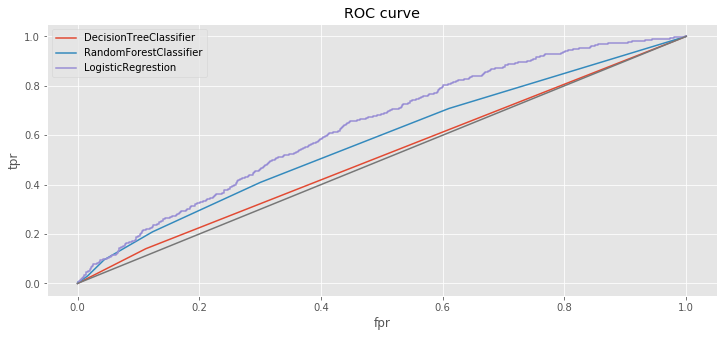

In [279]:
model=LogisticRegression()
model.fit(X,y)
#не выполняется на всех данных - stack overflow - пробую на небольшом наборе
predict_proba_L=model.predict_proba(X_test) 

fprD, tprD, thresholdsD = roc_curve(y_test, predict_proba_D[:,1])
fprR, tprR, thresholdsR = roc_curve(y_test, predict_proba_R[:,1])
fprL, tprL, thresholdsL = roc_curve(y_test, predict_proba_L[:,1])
plt.plot(fprD, tprD,label='DecisionTreeClassifier')
plt.plot(fprR, tprR,label='RandomForestClassifier')
plt.plot(fprL, tprL,label='LogisticRegrestion')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()

In [255]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here
rsc = RandomForestClassifier()
cross_val_score(
    rsc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.61744765, 0.59718001, 0.63142097, 0.58593381, 0.62918355,
       0.60820669, 0.57199004, 0.59674043, 0.58288511, 0.56290948])

In [258]:
dtc = DecisionTreeClassifier()
cross_val_score(dtc, X, y, scoring='roc_auc', cv=10)

array([0.53488686, 0.56033435, 0.50522627, 0.53909997, 0.52109929,
       0.53963188, 0.50498143, 0.54310638, 0.51002128, 0.51928435])

In [259]:
lr = LogisticRegression()
cross_val_score(lr, X, y, scoring='roc_auc', cv=10)

array([0.66863391, 0.61867612, 0.62789598, 0.61939379, 0.61863391,
       0.59865755, 0.625     , 0.63459574, 0.62707234, 0.5891885 ])

In [280]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

## Your Code Here
lr.fit(X,y)  
target_test=df_test_preproc['TARGET']
df_test=df_test_preproc.drop('TARGET',axis=1)
predict = lr.predict_proba(df_test)
list(zip(target_test,predict[:,1]))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


[(0, 0.1685699037121731),
 (0, 0.06788355279589756),
 (0, 0.17995088488806846),
 (0, 0.24836778088566383),
 (0, 0.1362406431694106),
 (0, 0.06953269575260249),
 (0, 0.034019570467970606),
 (0, 0.11527607821432259),
 (0, 0.07886577679589599),
 (1, 0.155821271689307),
 (0, 0.16956308275498805),
 (0, 0.10435596134173133),
 (0, 0.05348817786481987),
 (0, 0.09718215875073243),
 (0, 0.2776370506667921),
 (0, 0.19415764848174621),
 (0, 0.05111308567101379),
 (0, 0.039303114295557544),
 (0, 0.1514606710150648),
 (0, 0.06373779623936561),
 (0, 0.04059027857565168),
 (1, 0.1393549999325901),
 (0, 0.026834138891972285),
 (1, 0.15028505021072883),
 (0, 0.061280507971572334),
 (0, 0.11582426441784165),
 (1, 0.09457614176970539),
 (0, 0.23659433223228515),
 (0, 0.043912919772376366),
 (0, 0.229487090313745),
 (0, 0.03540882975008626),
 (0, 0.015722266085469085),
 (0, 0.08259842934827769),
 (0, 0.043522691139987614),
 (0, 0.07754100645902327),
 (0, 0.2779357713959284),
 (0, 0.06067514686657939),
 (0,

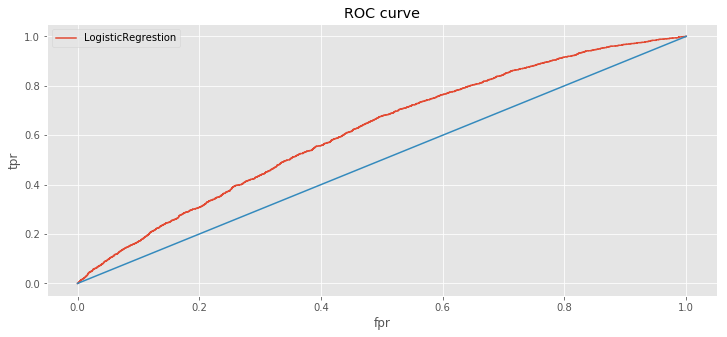

In [281]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

fpr, tpr, thresholds = roc_curve(target_test, predict[:,1])
plt.plot(fpr, tpr,label='LogisticRegrestion')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.legend()

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)